In [1]:
import eleanor
import numpy as np
import matplotlib.pyplot as plt

We can pass in a TIC, a Gaia DR2 ID, or coordinates (as a tuple or an Astropy SkyCoord object). Here we'll pass through the TIC corresponding to WASP-100.

Here we'll look at data for one sector. Further down in this notebook is an example to call ``multi_sector`` to get data for multiple sectors at once.

In [2]:
star = eleanor.Source(tic=38846515, sector=6, tc=True)

Inflating...


In [3]:
data = eleanor.TargetData(star, height=13, width=13, bkg_size=31, do_psf=False, do_pca=False)

/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/scipy/signal/_savitzky_golay.py:135: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  coeffs, _, _, _ = lstsq(A, y)


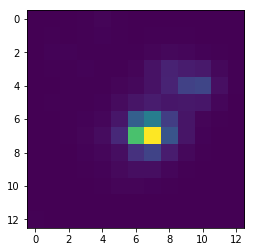

In [4]:
plt.imshow(data.tpf[0])

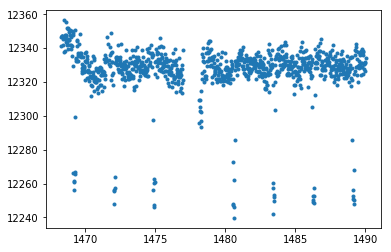

In [5]:
q = data.quality == 0
plt.plot(data.time[q], data.corr_flux[q], '.')

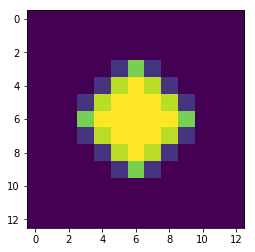

In [6]:
plt.imshow(data.aperture)

In [7]:
star.coords[0]

68.9597092399964

In [8]:
star.position_on_chip

array([1538, 1985])

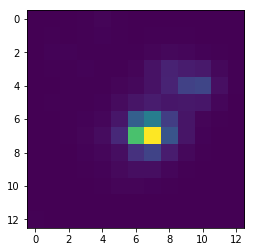

In [9]:
plt.imshow(data.tpf[0])

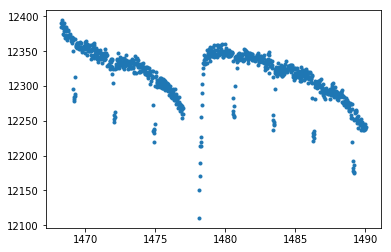

In [10]:
plt.plot(data.time[q], data.raw_flux[q], '.')


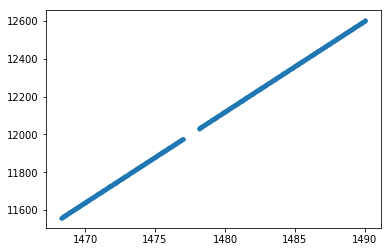

In [11]:
plt.plot(data.time, data.ffiindex, '.')

In [12]:
star = eleanor.multi_sectors(tic=307210830, sectors='all', tc=True)

Found star in Sector(s) 2 5 8 9 10
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...


0
1
2
3
4


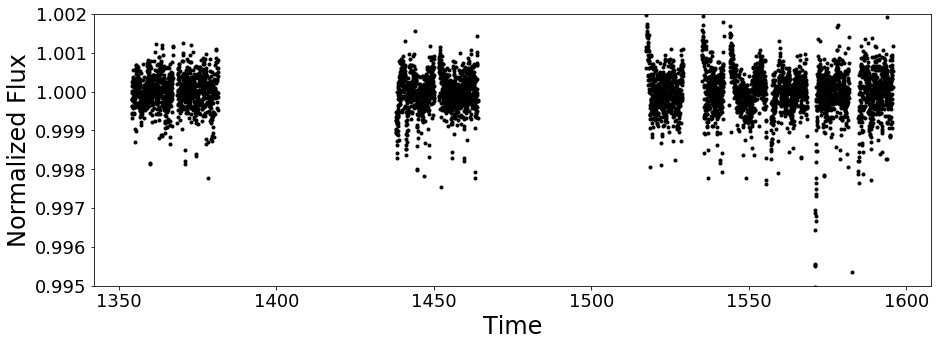

In [13]:
plt.figure(figsize=(15,5))
for i in range(len(star)):
    print(i)
    data0 = eleanor.TargetData(star[i], height=15, width=15, bkg_size=31, do_psf=False, do_pca=False)

    q0 = data0.quality == 0

    plt.plot(data0.time[q0], data0.corr_flux[q0]/np.median(data0.corr_flux[q0]), 'k.')

plt.ylabel('Normalized Flux', fontsize=24)
plt.xlabel('Time', fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.ylim(0.995, 1.002)

plt.show()

Found star in Sector(s) 1 2 3 4 5 6 7 8 9 10
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
Inflating...
0


/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
100%|██████████| 1282/1282 [00:17<00:00, 72.83it/s]


1


100%|██████████| 1245/1245 [00:14<00:00, 83.90it/s]


2


100%|██████████| 1288/1288 [00:19<00:00, 65.23it/s]


3


100%|██████████| 1060/1060 [00:12<00:00, 83.06it/s]


4


100%|██████████| 1196/1196 [00:14<00:00, 84.46it/s]


5


100%|██████████| 993/993 [00:11<00:00, 85.80it/s]


6


100%|██████████| 1093/1093 [00:12<00:00, 86.51it/s]


7


100%|██████████| 968/968 [00:11<00:00, 85.58it/s]


8


100%|██████████| 1154/1154 [00:14<00:00, 81.55it/s]


9


100%|██████████| 1211/1211 [00:14<00:00, 82.52it/s]


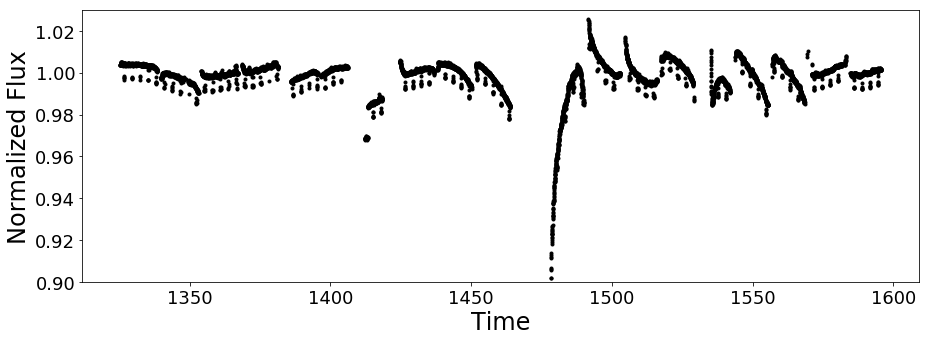

In [14]:
star = eleanor.multi_sectors(tic=38846515, sectors='all', tc=True)

plt.figure(figsize=(15,5))

time = np.array([])
flux = np.array([])

#plt.figure(figsize=(15,5))
for i in range(len(star)):
    print(i)
    data0 = eleanor.TargetData(star[i], height=15, width=15, bkg_size=31, do_psf=True, do_pca=False)

    q0 = data0.quality == 0

    plt.plot(data0.time[q0], data0.psf_flux[q0]/np.median(data0.psf_flux[q0]) + 0.00, 'k.')
    
    time = np.append(time, data0.time[q0])
    flux = np.append(flux, data0.psf_flux[q0]/np.median(data0.psf_flux[q0]))

plt.ylabel('Normalized Flux', fontsize=24)
plt.xlabel('Time', fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylim(0.90, 1.03)

plt.show()